# Incentive
The aim of this notebook is to build a neural network that acts as logistic regression. The process will be raw, that is, without using specialized libraries (Tensorflow, Keras). I will only use [Numpy](https://numpy.org/) to be able to perform the necessary calculations. The neural network consists, specifically, in a Cat/Non-cat neural network.

This notebook is made up of two clearly differentiated sections:
- [Overview of the problem set](#1.-Overview-of-the-problem-set)

- [Design of the algorithm](#2.-Design-of-the-algorithm)

In [1]:
#The CATaset
!tar -xf ./compressedFiles/1_First_Neural_Network.tar.xz
import numpy as np
import h5py # package to interact with a dataset that is stored on an H5 file.
from lr_utils import load_dataset #own function of the dataset useful to load it

## 1. Overview of the problem set

The dataset ("data.h5") contains:
- A training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- A test set of m_test images labeled as cat or non-cat
- Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print("Class of the dataset: " + str(type(train_set_x_orig)) + "\n")
print("Shape of the X_train set: " + str(train_set_x_orig.shape) + "\n")
print("Shape of the Y_train set:\n" + str(train_set_y) + "\n")
print("Shape of the Y_train set:\n" + str(train_set_y.shape[1]))

Class of the dataset: <class 'numpy.ndarray'>

Shape of the X_train set: (209, 64, 64, 3)

Shape of the Y_train set:
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]

Shape of the Y_train set:
209


We have 209 images for training with their respective labels. Each image has a resolution of 64 pixels (num_px) in height and width.
We can visualize a few examples:

In [3]:
import matplotlib.pyplot as plt # library to plot graphs in Python.
%matplotlib inline

y = [0], it's a 'non-cat' picture.


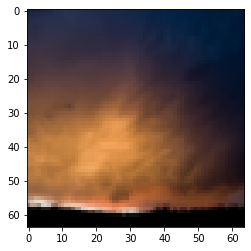

In [4]:
index = 0
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


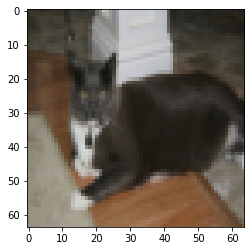

In [5]:
index = 47
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

After that we can start with the processing of the images.

In [6]:
# Reshaping the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [7]:
# set standardization
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

Now, we can start to design the model.

## 2. Design of the algorithm

This second part of the notebook is, in turn, divided into two other sections:
- [Basis](#2.1-Basis)
- [Code](#2.2-Code)

The first one explains what the neural network that I am going to build is based on. In addition, the equations necessary to find the corrections of the back-forward-propagation characteristic of a neural network are seen.
In the second one, I build the model step by step.

### 2.1 Basis
A logistic regression will be carried out to make the prediction of the cat images, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network**

<img src="https://docs.google.com/uc?export=download&id=10OGVfg-M2y-iGjHEUoZBBOH-F-9JC28k" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
Given this, the steps are: 
- Initialize the parameters of the model.
- [Learn the parameters for the model by minimizing the cost](#Learn-the-parameters:-forward-and-backward-propagation).
- Use the learned parameters to make predictions (on the test set).
- Analyse the results and conclude.

#### Learn the parameters: forward and backward propagation
When the parameters are initialized, it is time to do the "forward" and "backward" propagation steps for learning the parameters.

Equations for forward propagation:
- I get X (train images set).
- I compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- I calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

These two formulas will be used: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

### 2.2 Code

In [8]:
#FUNCTION: sigmoid
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [9]:
#FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [11]:
#FUNCTION: propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = 1/(1+(1/np.exp(np.dot(w.T,X)+b)))
    cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))/m
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
#FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule ( update rule is 𝜃=𝜃−𝛼𝑑𝜃)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
#FUNCTION: predict
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = 1/(1+(1/np.exp(np.dot(w.T,X)+b)))
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0][i] <= 0.5:
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] =   1             
    
    return Y_prediction

In [17]:
#FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Logistic regression model by calling the function I've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    dim = X_train.shape[0]
    #Initialization of the parameters with zeros
    w, b = initialize_with_zeros(dim)

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Prediction test/train
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Let's run the model!

In [18]:
manual_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Training accuracy is close to 100%. The model is working and has high enough capacity to fit the training data. Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset used and that logistic regression is a linear classifier. I conclude, the model is clearly overfitting the training data.

In the next cell, a plot shows how the parameters are being learned.

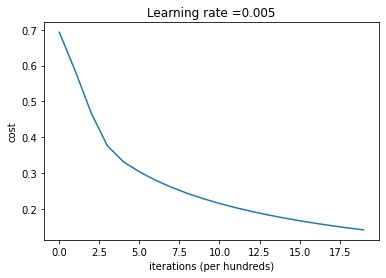

In [21]:
# Plot learning curve (with costs)
costs = np.squeeze(manual_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(manual_model["learning_rate"]))
plt.show()